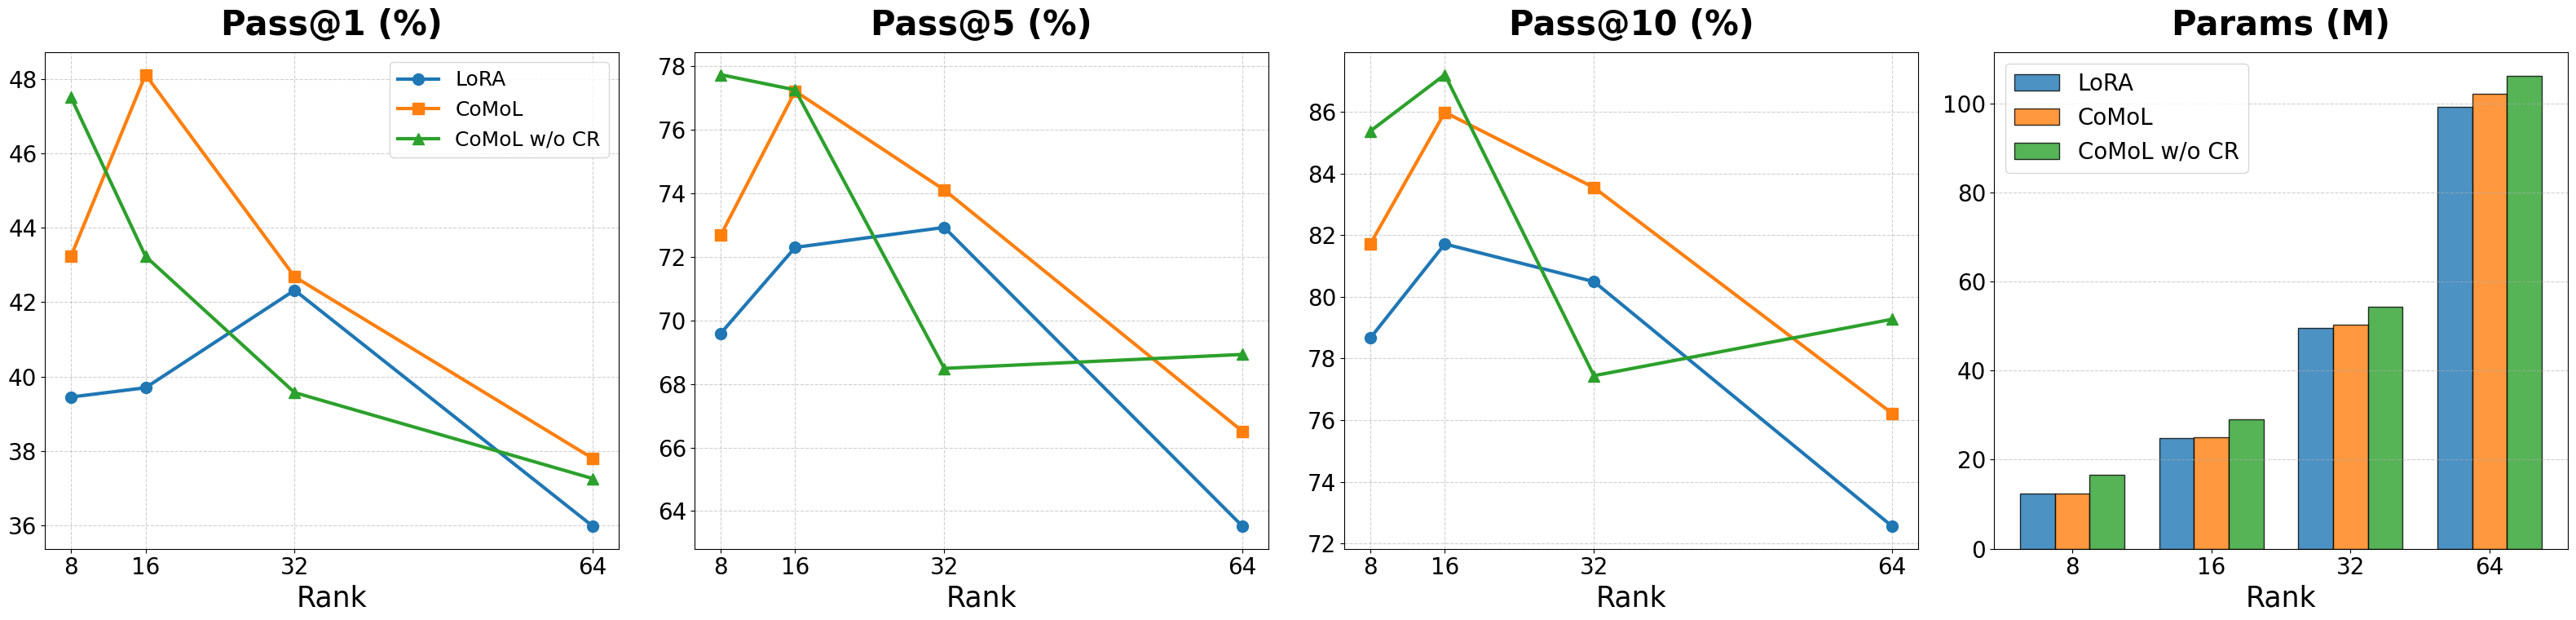

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 数据准备
data = {
    "LoRA": {
        "ranks": [8, 16, 32, 64],
        "pass1": [39.45, 39.70, 42.32, 35.98],
        "pass5": [69.59, 72.30, 72.93, 63.52],
        "pass10": [78.66, 81.71, 80.49, 72.56],
        "params": [12.39, 24.77, 49.55, 99.09]
    },
    "CoMoL": {
        "ranks": [8, 16, 32, 64],
        "pass1": [43.23, 48.11, 42.68, 37.80],
        "pass5": [72.68, 77.22, 74.11, 66.51],
        "pass10": [81.71, 85.98, 83.54, 76.22],
        "params": [12.44, 24.97, 50.31, 102.09]
    },
    "CoMoL w/o CR": {
        "ranks": [8, 16, 32, 64],
        "pass1": [47.50, 43.23, 39.57, 37.26],
        "pass5": [77.74, 77.26, 68.49, 68.93],
        "pass10": [85.37, 87.20, 77.44, 79.27],
        "params": [16.56, 29.09, 54.41, 106.17]
    }
}

# 2. 设置绘图风格和字体大小
# 设置全局字体大小为20
plt.rcParams.update({'font.size': 20})

# 定义方法列表、颜色和标记，保证一致性
methods = list(data.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝、橙、绿
markers = ['o', 's', '^']  # 圆点、方块、三角
linestyles = ['-', '-', '-']

# 创建画布：1行4列，尺寸设置大一些以容纳大字体
fig, axes = plt.subplots(1, 4, figsize=(32, 8))

# 3. 绘制前三个子图 (折线图: Pass1, Pass5, Pass10)
metrics = ['pass1', 'pass5', 'pass10']
titles = ['Pass@1 (%)', 'Pass@5 (%)', 'Pass@10 (%)']

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        x_data = data[method]['ranks']
        y_data = data[method][metric]
        
        ax.plot(x_data, y_data, 
                color=colors[j], 
                marker=markers[j], 
                linestyle=linestyles[j],
                linewidth=3,      # 线条加粗
                markersize=10,    # 标记变大
                label=method)
    
    ax.set_title(titles[i], fontweight='bold', fontsize=30, pad=15)
    ax.set_xlabel('Rank',fontsize=25)
    ax.set_xticks([8, 16, 32, 64]) # 强制显示这几个刻度
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # 仅在第一个子图显示图例
    if i == 0:
        ax.legend(fontsize=18, loc='best')

# 4. 绘制第四个子图 (柱状图: Param)
ax_param = axes[3]
ranks = [8, 16, 32, 64]
x_indices = np.arange(len(ranks))  # 柱状图的x轴基础坐标 [0, 1, 2, 3]
bar_width = 0.25  # 每个柱子的宽度

for j, method in enumerate(methods):
    y_data = data[method]['params']
    # 计算每个柱子的偏移位置，使它们并排显示
    # j=0 -> x - 0.25
    # j=1 -> x + 0.00
    # j=2 -> x + 0.25
    offset = (j - 1) * bar_width 
    
    ax_param.bar(x_indices + offset, y_data, 
                 width=bar_width, 
                 color=colors[j], 
                 label=method, 
                 edgecolor='black', # 柱子边缘加黑线
                 alpha=0.8)

ax_param.set_title('Params (M)', fontweight='bold', fontsize=30, pad=15)
ax_param.set_xlabel('Rank',fontsize=25)
ax_param.set_xticks(x_indices)
ax_param.set_xticklabels(ranks)
ax_param.grid(True, axis='y', linestyle='--', alpha=0.6)
# 第4个子图也显示图例
ax_param.legend(fontsize=20, loc='upper left')

# 5. 调整布局并保存/显示
plt.tight_layout()
plt.savefig('comol_rank.pdf', bbox_inches='tight', dpi=300)
plt.show()